## TPSAPR22 EDA which makes sense ⭐️⭐️⭐️⭐️⭐️
https://www.kaggle.com/code/ambrosm/tpsapr22-eda-which-makes-sense

In [22]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from cycler import cycler 
from IPython.display import display
import datetime

from sklearn.decomposition import PCA

plt.rcParams['axes.facecolor'] = '#007dbc' # DKT blue
plt.rcParams['axes.prop_cycle'] = cycler(color=['#ffd700'] + 
                                         plt.rcParams[
                                             'axes.prop_cycle'].by_key()[
                                                 'color'][1:])

In [12]:
train = pd.read_csv('../tps-apr-2022/train.csv')
train_labels = pd.read_csv('../tps-apr-2022/train_labels.csv')
test = pd.read_csv('../tps-apr-2022/test.csv')

print()
print('Train')
display(train.head())

print()
print('Train_labels')
display(train_labels.head())

print()
print('Test')
display(train_labels.head())

print('Dataframe shapes:', train.shape, train_labels.shape, 
      test.shape)
print()
print(f'Sequence numbering in train_labels: from {train_labels.sequence.min()}' + 
      f' to {train_labels.sequence.max()}')
print()
print(f'Step numbering: from {train.step.min()}' + 
      f' to {train.step.max()}')
print()
print(f'Subject numbering in train: from {train.subject.min()}' + 
      f' to {train.subject.max()}')
print()
print(f'Subject numbering in test: from {test.subject.min()}' + 
      f' to {test.subject.max()}')
print()
print(f'States: {np.unique(train_labels.state)}')



Train


,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,0,47,0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492
1,0,47,1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390
2,0,47,2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147
3,0,47,3,0.523184,0.751050,1.0,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241
4,0,47,4,0.272025,1.074580,1.0,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359



Train_labels


,sequence,state
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1



Test


,sequence,state
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


Dataframe shapes: (1558080, 16) (25968, 2) (733080, 16)

Sequence numbering in train_labels: from 0 to 25967

Step numbering: from 0 to 59

Subject numbering in train: from 0 to 671

Subject numbering in test: from 672 to 990

States: [0 1]


472      2
73       5
265      6
519      7
486      7
      ... 
87     129
647    144
635    158
1      175
437    199
Name: sequence count per training subject, Length: 672, dtype: int64
823      8
943     10
973     11
975     11
830     11
      ... 
874     98
865     99
781    103
682    107
748    148
Name: sequence count per test subject, Length: 319, dtype: int64


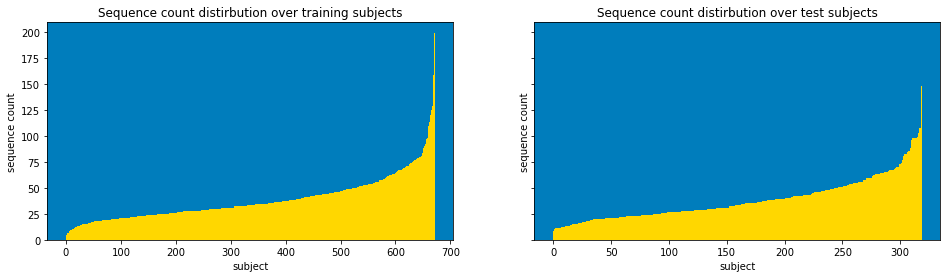

In [15]:
plt.subplots(1, 2, sharey=True, figsize=(16, 4))

def plot_sequence_count_distribution(df, title):
    temp = df.subject.value_counts().sort_values() // 60 # round down division
    plt.bar(range(len(temp)), temp, width=1)
    plt.xlabel('subject')
    plt.ylabel('sequence count')
    plt.title(f'Sequence count distirbution over {title} subjects')
    print(temp.sort_values().rename(f'sequence count per {title} subject'))

plt.subplot(1, 2, 1)
plot_sequence_count_distribution(train, 'training')
plt.subplot(1, 2, 2)
plot_sequence_count_distribution(test, 'test')
plt.show()

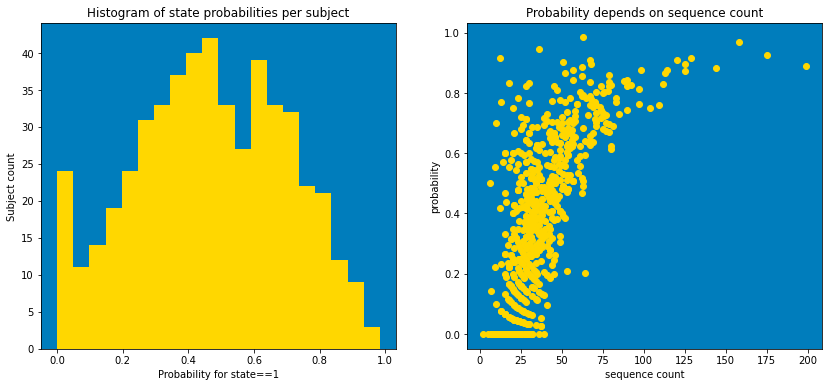


The standard deviation of 0.23 is much higher than 0.1

Subjects which are always in state 0: 59


In [18]:
temp = train.groupby('sequence').subject.min()
temp = train_labels.merge(temp, on='sequence')
temp = temp.groupby('subject').agg({'state': 'mean', 
                                    'sequence': 'count'}).rename(
                                        columns={'state': 'probability', 
                                                 'sequence': 'sequence_count'}
                                    )
temp1 = temp[temp.sequence_count>=25].probability.rename('Probability of state==1')

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(temp1, bins=20)
plt.ylabel('Subject count')
plt.xlabel('Probability for state==1')
plt.title('Histogram of state probabilities per subject')

plt.subplot(1, 2, 2)
plt.scatter(temp.sequence_count, temp.probability)
plt.xlabel('sequence count')
plt.ylabel('probability')
plt.title('Probability depends on sequence count')
plt.show()

print()
print(f'The standard deviation of {temp[temp.sequence_count>=25].probability.std():.2f}' + 
      ' is much higher than 0.1')
print()
print('Subjects which are always in state 0:', (temp.probability==0).sum())

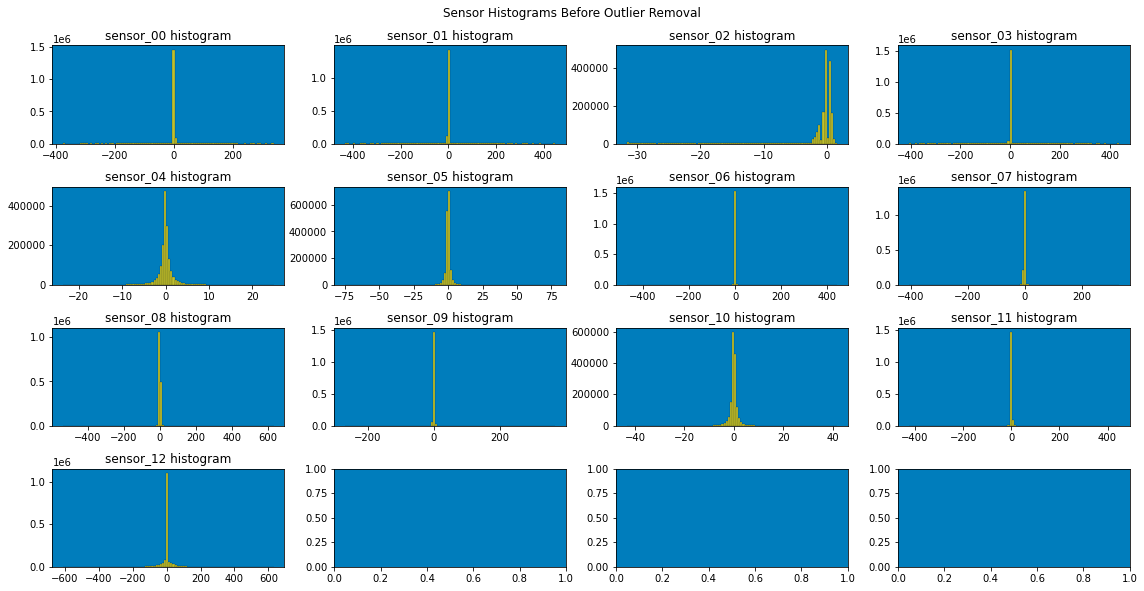

In [28]:
fig, axes = plt.subplots(4, 4, figsize=(16, 8))
axes = axes.flatten()

for i in range(13):
    sensor_name = f'sensor_{i:02d}'
    sns.histplot(data=train[sensor_name], bins=100, ax=axes[i])
    axes[i].set_title(f'{sensor_name} histogram')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

fig.tight_layout(h_pad=1.0, w_pad=0.5)
plt.suptitle('Sensor Histograms Before Outlier Removal', y=1.02)
plt.show()

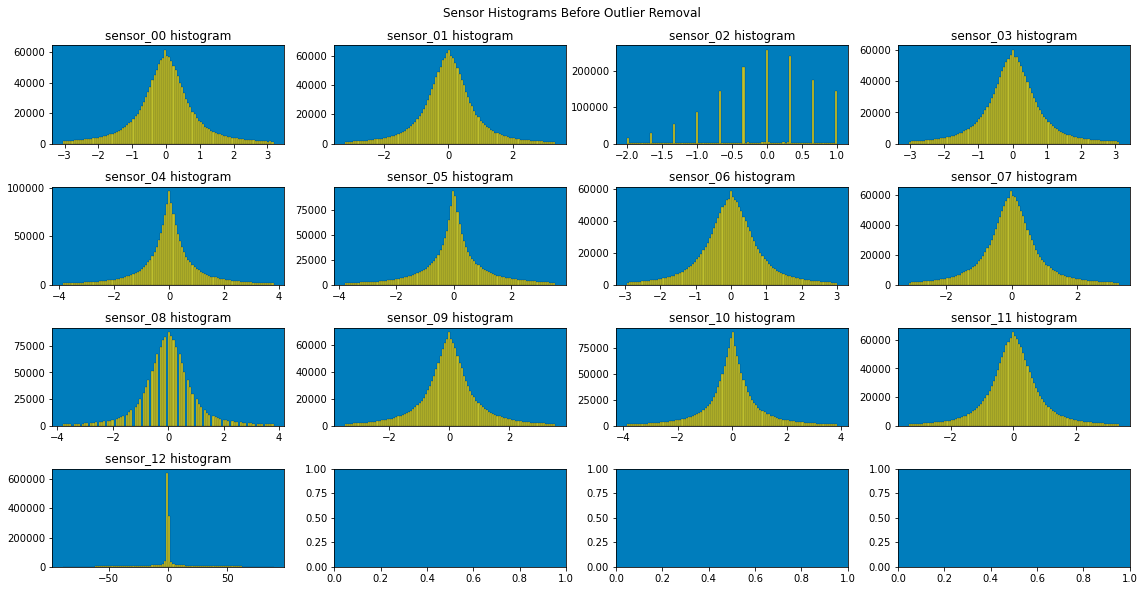

In [33]:
fig, axes = plt.subplots(4, 4, figsize=(16, 8))
axes = axes.flatten()

for i in range(13):
    sensor_name = f'sensor_{i:02d}'
    data_002 = train[sensor_name].quantile(0.02)
    data_098 = train[sensor_name].quantile(0.98)
    data = train[sensor_name][(train[sensor_name]>=data_002)&
                              (train[sensor_name]<=data_098)]
    sns.histplot(data=data, bins=100, ax=axes[i])
    axes[i].set_title(f'{sensor_name} histogram')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

fig.tight_layout(h_pad=1.0, w_pad=0.5)
plt.suptitle('Sensor Histograms Before Outlier Removal', y=1.02)
plt.show()

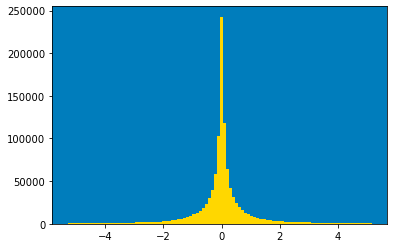

In [34]:
sensor_name = 'sensor_12' 
plt.hist(train[sensor_name], bins=100, 
         range=(train[sensor_name].quantile(0.15), 
                train[sensor_name].quantile(0.85)))
plt.show()

In [35]:
print('Count of unique values per sensor:')
for sensor in range(13):
    sensor_name = f'sensor_{sensor:02d}' 
    print(f'{sensor_name}: {len(np.unique(train[sensor_name])):6d}')

Count of unique values per sensor:
sensor_00:  25792
sensor_01:  28326
sensor_02:   4771
sensor_03:  26976
sensor_04: 387971
sensor_05:  22839
sensor_06:  25078
sensor_07:  28147
sensor_08:   1924
sensor_09:  30127
sensor_10: 268478
sensor_11:  28932
sensor_12: 303949


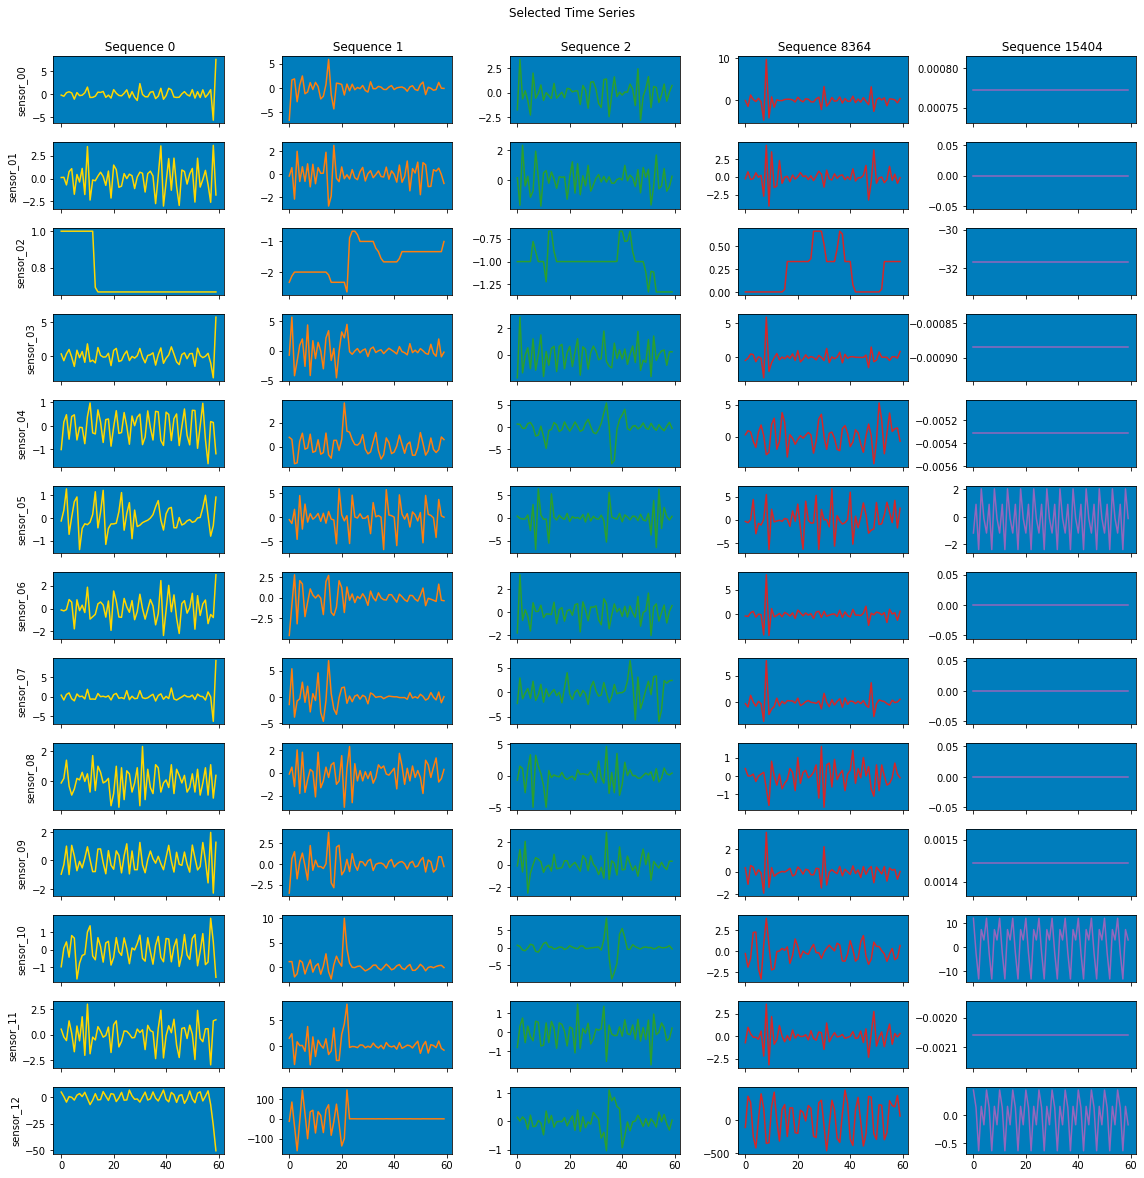

In [45]:
sequences = [0, 1, 2, 8364, 15404]

fig, axes = plt.subplots(13, len(sequences), 
                         sharex=True, figsize=(16, 16))
#axes = axes.flatten()
for i in range(13):
    sensor_name = f'sensor_{i:02d}' 
    for j, sequence in enumerate(sequences):
        sns.lineplot(x=range(60), y=train[train.sequence==sequence][sensor_name], 
                 color=plt.rcParams['axes.prop_cycle'].by_key()['color'][j % 10], 
                 ax=axes[i, j])
        
        if i == 0: axes[i, j].set_title(f' Sequence {sequence}')
        else: axes[i, j].set_title('')
        if sequence == sequences[0]: axes[i, j].set_ylabel(sensor_name)
        else: axes[i, j].set_ylabel('')
fig.tight_layout(w_pad=0.1)
plt.suptitle('Selected Time Series', y=1.02)
plt.show()

In [46]:
# for every sensor: count the sequences where the sensor is stuck at a constant value

def stuck_at_constant(seq):
    return seq.min() == seq.max() 

for sensor in range(13):
    sensor_name = f'sensor_{sensor:02d}'
    stuck_sequences = train.groupby('sequence')[sensor_name].apply(stuck_at_constant)
    print(f'{sensor_name}: {stuck_sequences.sum():4d} {train_labels[stuck_sequences].state.mean()}')

sensor_00:   44 0.0
sensor_01:   44 0.0
sensor_02: 1280 0.04609375
sensor_03:   44 0.0
sensor_04:   25 0.0
sensor_05:    0 nan
sensor_06:   44 0.0
sensor_07:   44 0.0
sensor_08:   44 0.0
sensor_09:   44 0.0
sensor_10:    0 nan
sensor_11:   44 0.0
sensor_12:   19 0.0


In [47]:
train_pivoted = train.pivot(index=['sequence', 'subject'], columns='step', 
                            values=[col for col in train.columns if 'sensor_' in col])
train_pivoted

sensor_00                                                    \
step                    0         1         2         3         4         5    
sequence subject                                                               
0        47      -0.196291 -0.447450  0.326893  0.523184  0.272025 -1.073416   
1        66      -6.657651  1.633694  1.863215 -2.846213  0.593509  2.469861   
2        66      -1.741886  3.402628 -0.632148  0.208655 -0.800618 -2.274343   
3        542      0.264297 -1.808346  0.078825  1.037094 -0.189335 -1.302937   
4        437      0.567233 -0.823802  1.476816 -1.710201 -0.408810  0.556414   
...                    ...       ...       ...       ...       ...       ...   
25963    558     -1.441267  2.359351 -0.881762  1.299073 -0.862442 -1.428130   
25964    297      0.996909  0.415765  1.874034 -5.220247  2.927357 -0.311437   
25965    129     -0.097372 -0.860896  0.928903  0.750386  1.346986 -3.422720   
25966    170     -0.357032 -1.603555 -0.296754  0.273570  0.462133  0.244977   
25967    327     -0.313756  0.392581 -0.554096  0.070325 -0.258114  0.095054   

                                                          ...  sensor_12  \
step                    6         7         8         9   ...         50   
sequence subject                                          ...              
0        47       0.350850 -0.304482 -0.216383  0.303709  ...  -1.670077   
1        66      -1.202473 -0.829212  1.091190 -0.334621  ...  -0.338022   
2        66       2.009274 -0.563369 -0.050232  0.800618  ...  -0.172634   
3        542      1.078825  2.257342 -2.283617 -2.759660  ...   0.145354   
4        437      0.853168 -0.406491 -0.009274 -0.021638  ...   0.001705   
...                    ...       ...       ...       ...  ...        ...   
25963    558      0.125193  2.119784  0.208655  1.847759  ...   0.049020   
25964    297      0.496909  0.372488 -0.341577 -0.565688  ...  36.889173   
25965    129      0.983771  2.818393 -1.460587 -1.988408  ...   2.394714   
25966    170     -0.341577 -0.229521  0.877125 -1.197063  ...  14.010656   
25967    327      0.387172 -0.824575  0.471406 -0.037094  ...   0.909207   

                                                                         \
step                     51         52         53         54         55   
sequence subject                                                          
0        47       -5.306479   3.621057   4.965047  -3.615090   0.791134   
1        66        0.234868   0.030691   0.037511  -0.120205   0.056692   
2        66        0.091645  -0.028986  -0.202472   0.332481  -0.013214   
3        542      -0.045610  -0.098039  -0.049446   0.055840  -0.022165   
4        437      -0.050725  -0.025149   0.106138  -0.098465  -0.040068   
...                     ...        ...        ...        ...        ...   
25963    558      -0.089940   0.059250  -0.013640  -0.083973   0.026002   
25964    297      21.105286  -4.421142  16.871697  -4.326939 -13.625320   
25965    129      -0.677323   1.435209  -0.645780  -0.449275   0.271952   
25966    170      48.826939  25.958227  -7.077153 -12.375533   9.170077   
25967    327      -0.830776  -1.007246   1.064365   0.639812  -0.914749   

                                                             
step                    56         57         58         59  
sequence subject                                             
0        47       5.887042  -7.211424 -26.738704 -50.658994  
1        66       0.062234  -0.013640   0.098039  -0.115090  
2        66       0.245524  -0.091219  -0.306905   0.046036  
3        542      0.054135  -0.185422   0.311168  -0.166240  
4        437      0.135976   0.121910  -0.059676  -0.087809  
...                    ...        ...        ...        ...  
25963    558      0.036232  -0.042199   0.028986  -0.015772  
25964    297      9.957374 -13.389173 -17.123615   9.219523  
25965    129     -0.262575   0.713129  -1.378517   1.802217  
25966    170      6.789855 -15.28729

In [52]:
temp = train_pivoted.sort_values(by=list(train_pivoted.columns))
duplicates_first = temp.duplicated(keep='first')
duplicates_last = temp.duplicated(keep='last')
temp['duplicates_first'] = duplicates_first 
temp['duplicates_last'] = duplicates_last 
duplicates = temp[duplicates_first | duplicates_last]
display(duplicates)

print()
print('All these sequences have sensor_00 stuck at 0.000773:', 
      duplicates['sensor_00'].apply(stuck_at_constant).all())

print()
print(f'Labels of the duplicates: {list(train_labels.loc[duplicates.index.get_level_values(0)].state)}')

sensor_00                                                    \
step                     0         1         2         3         4         5   
sequence subject                                                               
5882     573      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
16294    573      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
346      573      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
1772     573      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
14349    234      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
21524    234      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
3335     359      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
9324     359      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
16829    359      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
25576    359      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
1957     401      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
4512     401      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
6428     234      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
12958    234      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
1586     48       0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
10633    48       0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
1428     48       0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
25450    48       0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
2817     48       0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
11926    48       0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
36       573      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   
11560    573      0.000773  0.000773  0.000773  0.000773  0.000773  0.000773   

                                                          ... sensor_12  \
step                     6         7         8         9  ...        52   
sequence subject                                          ...             
5882     573      0.000773  0.000773  0.000773  0.000773  ...  0.547315   
16294    573      0.000773  0.000773  0.000773  0.000773  ...  0.547315   
346      573      0.000773  0.000773  0.000773  0.000773  ...  0.561381   
1772     573      0.000773  0.000773  0.000773  0.000773  ...  0.561381   
14349    234      0.000773  0.000773  0.000773  0.000773  ...  0.031969   
21524    234      0.000773  0.000773  0.000773  0.000773  ...  0.031969   
3335     359      0.000773  0.000773  0.000773  0.000773  ...  0.046462   
9324     359      0.000773  0.000773  0.000773  0.000773  ...  0.046462   
16829    359      0.000773  0.000773  0.000773  0.000773  ...  0.046462   
25576    359      0.000773  0.000773  0.000773  0.000773  ...  0.046462   
1957     401      0.000773  0.000773  0.000773  0.000773  ... -0.616795   
4512     401      0.000773  0.000773  0.000773  0.000773  ... -0.616795   
6428     234      0.000773  0.000773  0.000773  0.000773  ...  1.187553   
12958    234      0.000773  0.000773  0.000773  0.000773  ...  1.187553   
1586     48       0.000773  0.000773  0.000773  0.000773  ...  0.029838   
10633    48       0.000773  0.000773  0.000773  0.000773  ...  0.029838   
1428     48       0.000773  0.000773  0.000773  0.000773  ... -0.084825   
25450    48       0.000773  0.000773  0.000773  0.000773  ... -0.084825   
2817     48       0.000773  0.000773  0.000773  0.000773  ... -0.159847   
11926    48       0.000773  0.000773  0.000773  0.000773  ... -0.159847   
36       573      0.000773  0.000773  0.000773  0.000773  ... -0.928389   
11560    573      0.000773  0.000773  0.000773  0.000773  ... -0.928389   

                                                                              \
step                    53        54        55        56    


All these sequences have sensor_00 stuck at 0.000773: True

Labels of the duplicates: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


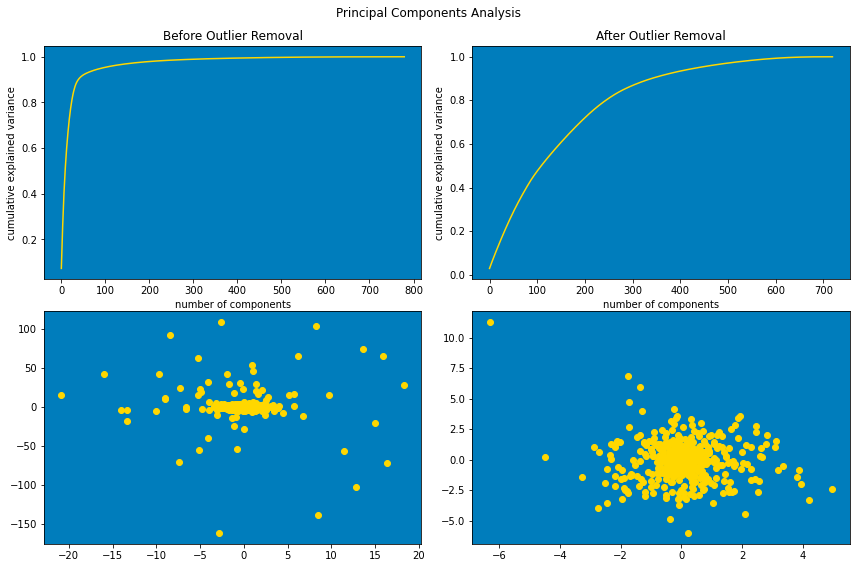

In [57]:
def plot_pca(df, col, title):
    pca = PCA()

    Xt = pca.fit_transform(df.values)

    plt.subplot(2, 2, col+1)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.title(title)

    plt.subplot(2, 2, col+3)
    plt.scatter(Xt[0], Xt[1])

temp = train_pivoted.clip(train_pivoted.quantile(0.02, axis=0).values, 
                          train_pivoted.quantile(0.98, axis=0).values, 
                          axis=1)
temp.pop('sensor_12')

plt.figure(figsize=(12, 8))
plot_pca(train_pivoted, 0, 'Before Outlier Removal')
plot_pca(temp, 1, 'After Outlier Removal')
plt.suptitle('Principal Components Analysis')
plt.tight_layout(h_pad=0.1)
plt.show()

## TPSAPR22 Best Model Without NN
https://www.kaggle.com/code/ambrosm/tpsapr22-best-model-without-nn/notebook

In [59]:
import scipy.stats
from sklearn.model_selection import GroupKFold, cross_val_score 
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingClassifier
from sklearn.feature_selection import SequentialFeatureSelector 
from sklearn.metrics import roc_auc_score, roc_curve 
from xgboost import XGBClassifier 
from sklearn.pipeline import make_pipeline 

In [62]:
train = pd.read_csv('../tps-apr-2022/train.csv')
train_labels = pd.read_csv('../tps-apr-2022/train_labels.csv')
test = pd.read_csv('../tps-apr-2022/test.csv')

sensors = train.columns[train.columns.str.startswith('sensor_')].tolist()
sensors

['sensor_00',
 'sensor_01',
 'sensor_02',
 'sensor_03',
 'sensor_04',
 'sensor_05',
 'sensor_06',
 'sensor_07',
 'sensor_08',
 'sensor_09',
 'sensor_10',
 'sensor_11',
 'sensor_12']

In [63]:
train_pivoted0 = train.pivot(index=['sequence', 'subject'], 
                             columns='step', values=sensors)
display(train_pivoted0)

sensor_00                                                    \
step                    0         1         2         3         4         5    
sequence subject                                                               
0        47      -0.196291 -0.447450  0.326893  0.523184  0.272025 -1.073416   
1        66      -6.657651  1.633694  1.863215 -2.846213  0.593509  2.469861   
2        66      -1.741886  3.402628 -0.632148  0.208655 -0.800618 -2.274343   
3        542      0.264297 -1.808346  0.078825  1.037094 -0.189335 -1.302937   
4        437      0.567233 -0.823802  1.476816 -1.710201 -0.408810  0.556414   
...                    ...       ...       ...       ...       ...       ...   
25963    558     -1.441267  2.359351 -0.881762  1.299073 -0.862442 -1.428130   
25964    297      0.996909  0.415765  1.874034 -5.220247  2.927357 -0.311437   
25965    129     -0.097372 -0.860896  0.928903  0.750386  1.346986 -3.422720   
25966    170     -0.357032 -1.603555 -0.296754  0.273570  0.462133  0.244977   
25967    327     -0.313756  0.392581 -0.554096  0.070325 -0.258114  0.095054   

                                                          ...  sensor_12  \
step                    6         7         8         9   ...         50   
sequence subject                                          ...              
0        47       0.350850 -0.304482 -0.216383  0.303709  ...  -1.670077   
1        66      -1.202473 -0.829212  1.091190 -0.334621  ...  -0.338022   
2        66       2.009274 -0.563369 -0.050232  0.800618  ...  -0.172634   
3        542      1.078825  2.257342 -2.283617 -2.759660  ...   0.145354   
4        437      0.853168 -0.406491 -0.009274 -0.021638  ...   0.001705   
...                    ...       ...       ...       ...  ...        ...   
25963    558      0.125193  2.119784  0.208655  1.847759  ...   0.049020   
25964    297      0.496909  0.372488 -0.341577 -0.565688  ...  36.889173   
25965    129      0.983771  2.818393 -1.460587 -1.988408  ...   2.394714   
25966    170     -0.341577 -0.229521  0.877125 -1.197063  ...  14.010656   
25967    327      0.387172 -0.824575  0.471406 -0.037094  ...   0.909207   

                                                                         \
step                     51         52         53         54         55   
sequence subject                                                          
0        47       -5.306479   3.621057   4.965047  -3.615090   0.791134   
1        66        0.234868   0.030691   0.037511  -0.120205   0.056692   
2        66        0.091645  -0.028986  -0.202472   0.332481  -0.013214   
3        542      -0.045610  -0.098039  -0.049446   0.055840  -0.022165   
4        437      -0.050725  -0.025149   0.106138  -0.098465  -0.040068   
...                     ...        ...        ...        ...        ...   
25963    558      -0.089940   0.059250  -0.013640  -0.083973   0.026002   
25964    297      21.105286  -4.421142  16.871697  -4.326939 -13.625320   
25965    129      -0.677323   1.435209  -0.645780  -0.449275   0.271952   
25966    170      48.826939  25.958227  -7.077153 -12.375533   9.170077   
25967    327      -0.830776  -1.007246   1.064365   0.639812  -0.914749   

                                                             
step                    56         57         58         59  
sequence subject                                             
0        47       5.887042  -7.211424 -26.738704 -50.658994  
1        66       0.062234  -0.013640   0.098039  -0.115090  
2        66       0.245524  -0.091219  -0.306905   0.046036  
3        542      0.054135  -0.185422   0.311168  -0.166240  
4        437      0.135976   0.121910  -0.059676  -0.087809  
...                    ...        ...        ...        ...  
25963    558      0.036232  -0.042199   0.028986  -0.015772  
25964    297      9.957374 -13.389173 -17.123615   9.219523  
25965    129     -0.262575   0.713129  -1.378517   1.802217  
25966    170      6.789855 -15.28729

In [74]:
# Feature engineering
def engineer(df):
    new_df = pd.DataFrame([], index=df.index)
    for sensor in sensors:
        new_df[f'{sensor}_mean'] = df[sensor].mean(axis=1)
        new_df[f'{sensor}_std'] = df[sensor].std(axis=1)
        new_df[f'{sensor}_iqr'] = scipy.stats.iqr(df[sensor], axis=1)
        new_df[f'{sensor}_sm'] = np.nan_to_num(
            new_df[f'{sensor}_std'] / new_df[f'{sensor}_mean'].abs()
        ).clip(-1e30, 1e30)
        new_df[f'{sensor}_kurtosis'] = scipy.stats.kurtosis(df[sensor], axis=1)
    new_df['sensor_02_up'] = (df.sensor_02.diff(axis=1) > 0).sum(axis=1)
    new_df['sensor_02_down'] = (df.sensor_02.diff(axis=1) < 0).sum(axis=1)
    new_df['sensor_02_upsum'] = df.sensor_02.diff(axis=1).clip(0, None).sum(axis=1)
    new_df['sensor_02_downsum'] = (
        df.sensor_02.diff(axis=1).clip(None, 0).sum(axis=1)
    )
    new_df['sensor_02_upmax'] = df.sensor_02.diff(axis=1).max(axis=1)
    new_df['sensor_02_downmax'] = df.sensor_02.diff(axis=1).min(axis=1)
    new_df['sensor_02_upmean'] = np.nan_to_num(
        new_df['sensor_02_upsum'] / new_df['sensor_02_up'], posinf=40
    )
    new_df['sensor_02_downmean'] = np.nan_to_num(
        new_df['sensor_02_downsum'] / new_df['sensor_02_down'], neginf=-40
    )
    return new_df
    
train_pivoted = engineer(train_pivoted0)

train_shuffled = train_pivoted.sample(frac=1.0, random_state=42)
labels_shuffled =train_labels.reindex(train_shuffled.index.get_level_values('sequence'))
labels_shuffled = labels_shuffled[['state']].merge(train[['sequence', 'subject']].groupby('sequence').min(), 
                                                   how='left', on='sequence')
labels_shuffled = labels_shuffled.merge(labels_shuffled.groupby('subject').size().rename('sequence_count'), 
                                        how='left', on='subject')
train_shuffled['sequence_count_of_subject'] = labels_shuffled['sequence_count'].values 

selected_columns = train_shuffled.columns
print(len(selected_columns))

74


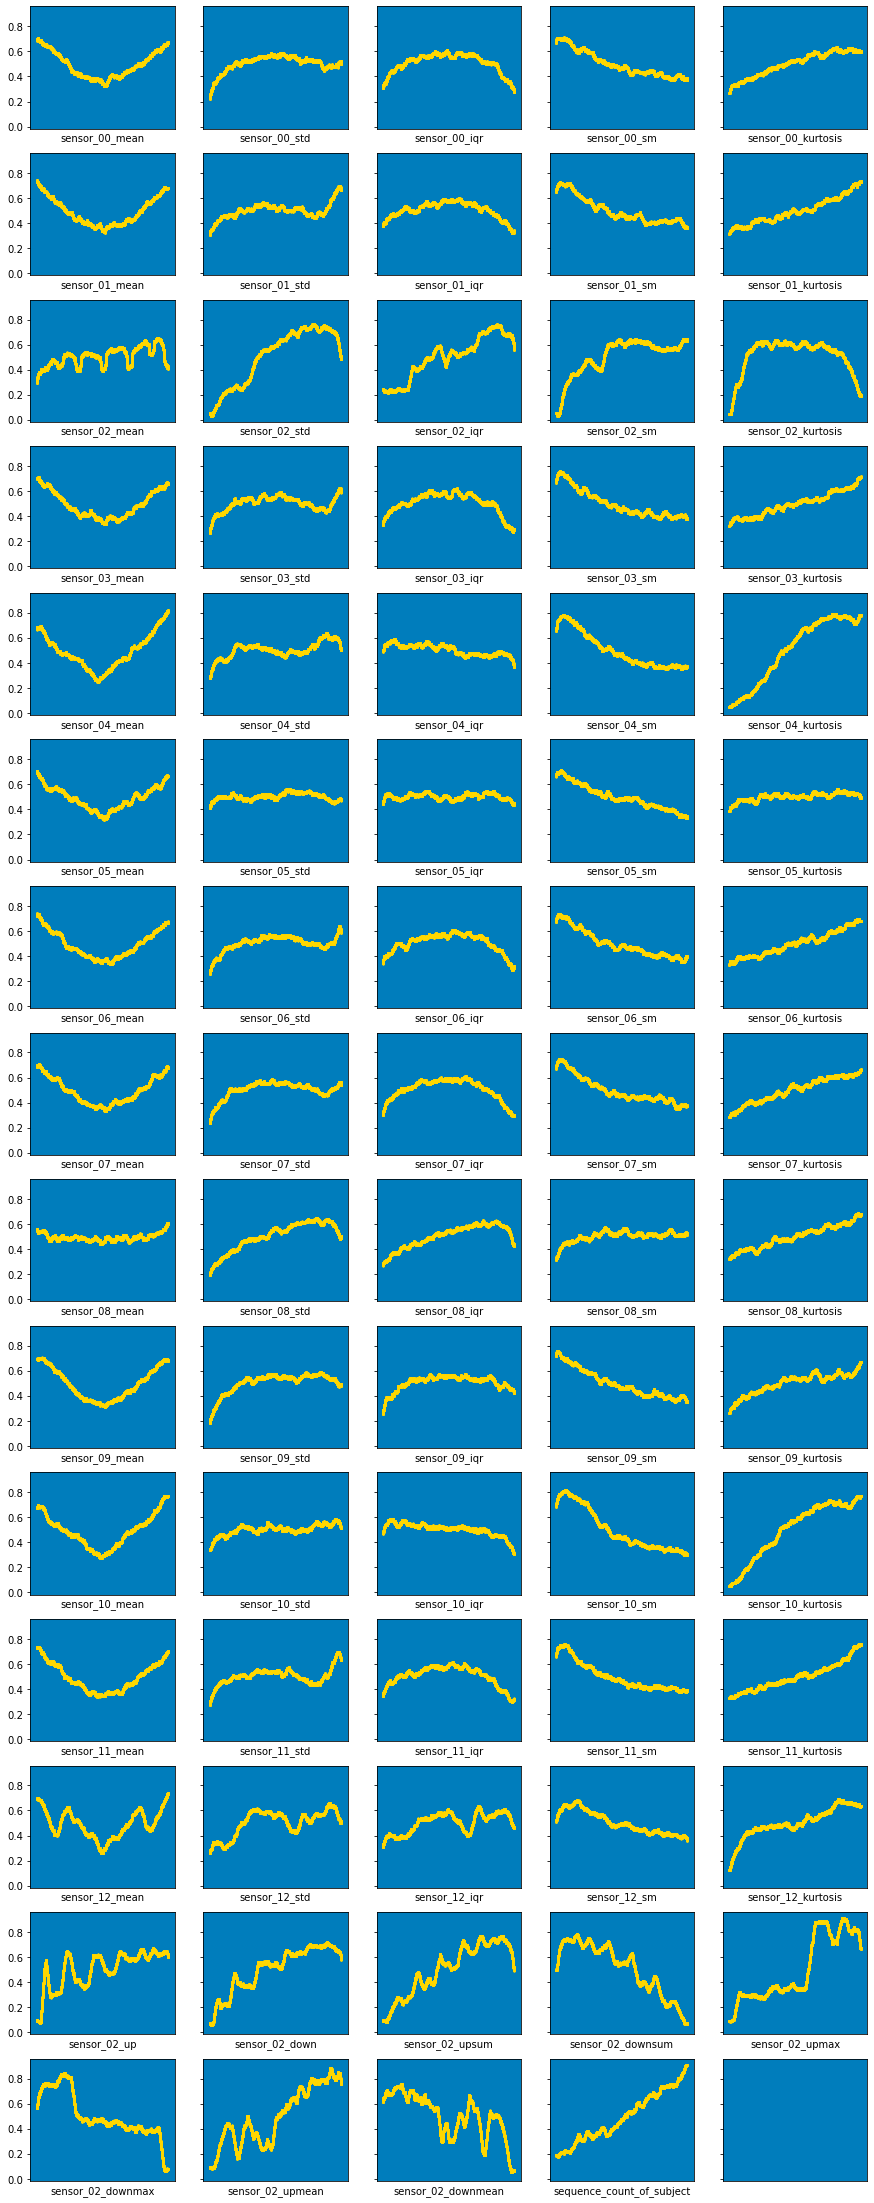

In [81]:
ncols = len(train_shuffled.columns) // 13

plt.subplots(15, ncols, sharey=True, sharex=True, figsize=(15, 40))
for i, col in enumerate(train_shuffled.columns):
    temp = pd.DataFrame({col: train_shuffled[col].values, 
                         'state': labels_shuffled.state.values})
    temp = temp.sort_values(col)
    temp.reset_index(inplace=True)
    plt.subplot(15, ncols, i+1)
    plt.scatter(temp.index, temp.state.rolling(1000).mean(), s=2)
    plt.xlabel(col)
    plt.xticks([])
plt.show()

In [82]:
dropped_columns = ['sensor_05_kurtosis', 'sensor_08_mean', 
                   'sensor_05_std', 'sensor_06_kurtosis', 
                   'sensor_06_std', 'sensor_03_std', 
                   'sensor_02_kurtosis', 'sensor_03_kurtosis', 
                   'sensor_09_kurtosis', 'sensor_03_mean', 
                   'sensor_00_mean', 'sensor_02_iqr', 
                   'sensor_05_mean', 'sensor_06_mean', 
                   'sensor_07_std', 'sensor_10_iqr', 
                   'sensor_11_iqr', 'sensor_12_iqr', 
                   'sensor_09_mean', 'sensor_02_sm', 
                   'sensor_03_sm', 'sensor_05_iqr', 
                   'sensor_06_sm', 'sensor_09_iqr', 
                   'sensor_07_iqr', 'sensor_10_mean']

selected_columns = [f for f in selected_columns if f not in dropped_columns]
len(selected_columns)

48

Added feature: sensor_04_kurtosis            0.787
Added feature: sensor_02_upmax               0.862
Added feature: sequence_count_of_subject     0.899
Added feature: sensor_02_downmax             0.918
Added feature: sensor_10_sm                  0.923
Added feature: sensor_02_std                 0.926
Added feature: sensor_00_std                 0.929
Added feature: sensor_05_sm                  0.931
Added feature: sensor_10_kurtosis            0.933
Added feature: sensor_01_sm                  0.935
Added feature: sensor_02_downsum             0.936
Added feature: sensor_12_sm                  0.937
Added feature: sensor_12_std                 0.938
Added feature: sensor_12_kurtosis            0.938
Added feature: sensor_09_sm                  0.939
Added feature: sensor_00_kurtosis            0.940
Added feature: sensor_04_std                 0.940
Added feature: sensor_04_mean                0.941
Added feature: sensor_07_sm                  0.941
Added feature: sensor_09_std   

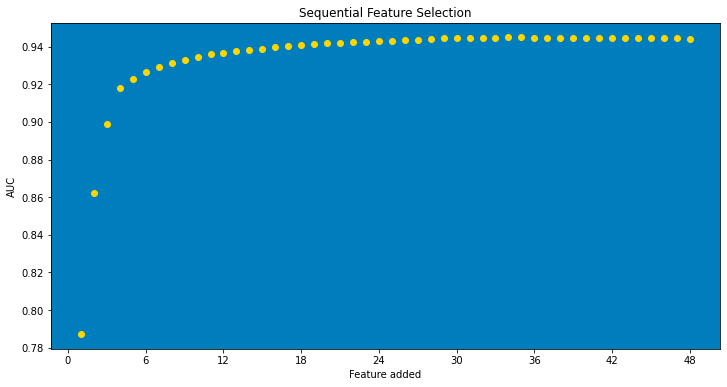

['sensor_00_std' 'sensor_00_iqr' 'sensor_00_sm' 'sensor_00_kurtosis'
 'sensor_01_mean' 'sensor_01_std' 'sensor_01_iqr' 'sensor_01_sm'
 'sensor_01_kurtosis' 'sensor_02_mean' 'sensor_02_std' 'sensor_03_iqr'
 'sensor_04_mean' 'sensor_04_std' 'sensor_04_iqr' 'sensor_04_sm'
 'sensor_04_kurtosis' 'sensor_05_sm' 'sensor_06_iqr' 'sensor_07_mean'
 'sensor_07_sm' 'sensor_07_kurtosis' 'sensor_08_std' 'sensor_08_iqr'
 'sensor_08_sm' 'sensor_08_kurtosis' 'sensor_09_std' 'sensor_09_sm'
 'sensor_10_std' 'sensor_10_sm' 'sensor_10_kurtosis' 'sensor_11_mean'
 'sensor_11_std' 'sensor_11_sm' 'sensor_11_kurtosis' 'sensor_12_mean'
 'sensor_12_std' 'sensor_12_sm' 'sensor_12_kurtosis' 'sensor_02_up'
 'sensor_02_down' 'sensor_02_upsum' 'sensor_02_downsum' 'sensor_02_upmax'
 'sensor_02_downmax' 'sensor_02_upmean' 'sensor_02_downmean'
 'sequence_count_of_subject']


In [85]:
estimator = HistGradientBoostingClassifier(learning_rate=0.05, 
                                           max_leaf_nodes=25, 
                                           max_iter=1000, 
                                           min_samples_leaf=500, 
                                           l2_regularization=1, 
                                           max_bins=255, 
                                           random_state=42, 
                                           verbose=0)

X, y = train_shuffled[selected_columns], labels_shuffled.state
n_iterations, backward = 48, False  

if n_iterations != 0:
    n_features = X.shape[1]
    current_mask = np.zeros(shape=n_features, dtype=bool)
    history = []
    for _ in range(n_iterations):
        candidate_feature_indices = np.flatnonzero(~current_mask)
        scores = {}
        for feature_idx in candidate_feature_indices:
            candidate_mask = current_mask.copy()
            candidate_mask[feature_idx] = True
            X_new = X.values[:, ~candidate_mask if backward else candidate_mask]
            scores[feature_idx] = cross_val_score(estimator, 
                                                  X_new, y, 
                                                  cv=GroupKFold(n_splits=5), 
                                                  groups=train_shuffled.index.get_level_values('subject'), 
                                                  scoring='roc_auc', 
                                                  n_jobs=-1).mean()
            
        new_feature_idx = max(scores, key=lambda feature_idx: scores[feature_idx])
        current_mask[new_feature_idx] = True 
        history.append(scores[new_feature_idx])
        new = 'Deleted' if backward else 'Added'
        print(f'{new} feature: {str(X.columns[new_feature_idx]):30}' 
              f'{scores[new_feature_idx]:.3f}')
        
    print()
    plt.figure(figsize=(12, 6))
    plt.scatter(np.arange(len(history)) + (0 if backward else 1), history)
    plt.ylabel('AUC')
    plt.xlabel('Features removed' if backward else 'Feature added')
    plt.title('Sequential Feature Selection')
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

    if backward:
        current_mask = ~current_mask 
    selected_columns = np.array(selected_columns)[current_mask]
    print(selected_columns)
                                                